In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [6]:
#Read Data
data = pd.read_csv('acs_data_new.csv', header=0)

In [7]:
#data_sea = data[data.city == 'Seattle']
#data = data_sea

(array([  2.,   1.,  31.,  86.,  70.,  43.,  16.,   7.,   5.,   3.]),
 array([       0.,   105070.,   210140.,   315210.,   420280.,   525350.,
          630420.,   735490.,   840560.,   945630.,  1050700.]),
 <a list of 10 Patch objects>)

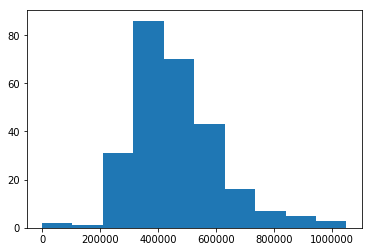

In [10]:
plt.hist(data['median house value'])

### Definition 1: Sociology 
#### Eligible for Gentrification:
* The block group’s median household income was in the bottom 40th percentile when compared to all block groups in Seattle at the beginning of the time span.
* The block group’s median house value was in the bottom 40th percentile when compared to all block groups in Seattle at the beginning of the time span.

#### Have gentrified:
* An increase in a block group’s educational attainment, as measured by the percentage of residents age 25 and over holding bachelor’s degrees, was in the top third percentile of all block groups in Seattle.
* An increase in a block group’s median house value, as measured by inflation-adjusted median house value, was in the top third percentile of all block groups in Seattle.


#### Calculations for Part1: Eligible for gentrification

In [13]:
# get the columns in variable names
median_income =np.array(data.loc[data['year'] == 2015, 'median income']. astype(int))
median_housevalue =np.array(data.loc[data['year'] == 2015, 'median house value']. astype(int))

In [14]:
# find percentiles for median income, house value and bachelor degree holders
income_40th_perc = np.percentile(median_income, 40)
houseval_40th_perc = np.percentile(median_housevalue, 40)

#### Calculations for Part2: Have gentrified

In [18]:
def add_col_for_inflation_adjusted_house_price_2010(row):
    if row['year'] == 2010:
        return row['median house value']*1.08

In [32]:
data['inflation_adj_median_house_value'] = data['median house value']*1.08

In [34]:
# get unique tract ids to iterate thru all records of 2015 and 2010
tract_id = data.Id.unique()

In [35]:
Data_for_2015 = np.where(data['year']== 2015)
Data_for_2010 = np.where(data['year']== 2010)


In [36]:
increase_in_edu_attainment_2015 = []
for s in tract_id:
    i = np.where(data['Id'] == s) # gives two indexes for each tract id(one for 2015 and another for 2010)
    # to find the percentage increase subtract the bachelors degree % for 2010 from bachelors degree % of 2015
    perc_increase = data['percent bachelors degree or higher'].iloc[i[0][0]] - data['percent bachelors degree or higher'].iloc[i[0][1]]
    increase_in_edu_attainment_2015.append(perc_increase)

In [37]:
increase_in_house_value_2015 = []
for s in tract_id:
    i = np.where(data['Id'] == s)
    perc_increase = data['inflation_adj_median_house_value'].iloc[i[0][0]] - data['inflation_adj_median_house_value'].iloc[i[0][1]]
    increase_in_house_value_2015.append(perc_increase)

In [38]:
data['increase_in_edu_attainment_2015'] = pd.Series(increase_in_edu_attainment_2015)
data['increase_in_house_value_2015'] = pd.Series(increase_in_house_value_2015)

In [39]:
increase_bachelor_degree_top3rd_percentile = np.percentile(increase_in_edu_attainment_2015, 66)
increase_house_value_top3rd_percentile = np.percentile(increase_in_house_value_2015, 66)

In [40]:
increase_house_value_top3rd_percentile

13281.840000000011

#### Labelling the tracts per definition 1

In [41]:
def label_def1(row):
   if row['year'] == 2010:
      return 'None'
   if row['year'] == 2015 and row['median income'] < income_40th_perc and row['median house value'] < houseval_40th_perc:
      return 'EligibleForGentrification'
   if row['year'] == 2015 and row['increase_in_edu_attainment_2015'] > increase_bachelor_degree_top3rd_percentile and row['increase_in_house_value_2015'] > increase_house_value_top3rd_percentile:
      return 'HaveGentrified'
   else:
      return 'NotEligibleForGentrification'

In [42]:
data['def_1'] = data.apply(label_def1, axis=1)

In [43]:
data.head()

,Id,Geography,neighborhood,city,year,total population,total households,median house value,percent public transportation,percent white not hispanic,...,total male 30-39yr,total male 40-49yr,total male 50-59yr,total male 60-64yr,total male 65-69yr,total male 70yr+,inflation_adj_median_house_value,increase_in_edu_attainment_2015,increase_in_house_value_2015,def_1
0,53033000100,"Census Tract 1, King County, Washington",Victory Heights,Seattle,2015,6918,3400,410700,0.198666,0.576323,...,635,457,461,182,134,233,443556.0,-1.9,-93528.0,NotEligibleForGentrification
1,53033000100,"Census Tract 1, King County, Washington",Victory Heights,Seattle,2010,5784,3110,497300,0.216394,0.575726,...,606,440,445,125,46,163,537084.0,3.4,-17604.0,None
2,53033000200,"Census Tract 2, King County, Washington",Pinehurst,Seattle,2015,7974,3572,342400,0.174445,0.566842,...,497,432,588,244,153,242,369792.0,-4.9,-11016.0,EligibleForGentrification
3,53033000200,"Census Tract 2, King County, Washington",Pinehurst,Seattle,2010,7682,3633,358700,0.152393,0.700729,...,609,638,665,122,115,289,387396.0,9.8,-54756.0,None
4,53033000300,"Census Tract 3, King County, Washington",Pinehurst,Seattle,2015,2637,1087,336300,0.220242,0.712931,...,228,152,253,57,60,68,363204.0,12.5,19440.0,EligibleForGentrification


### Definition 2: Financial & Economics
#### Currently gentrifying:
* The block group’s income levels below 40% of the median, and experienced rent increases greater than the median neighborhood did.

#### Have gentrified:
* The block group’s share of neighborhoods in a metro area that moved from the bottom half to the top half in the distribution of home prices.

#### Calculations for Part1: Currently gentrifying

In [44]:
median_income_40percent = np.percentile(median_income, 50)*0.4

#### Rent increase 

In [46]:
increase_in_rent_2015 = []
for s in tract_id:
    i = np.where(data['Id'] == s) # gives two indexes for each tract id(one for 2015 and another for 2010)
    rent_increase = data['median gross rent'].iloc[i[0][0]] - data['median gross rent'].iloc[i[0][1]]
    increase_in_rent_2015.append(rent_increase)

In [48]:
data['increase_in_rent_2015'] = pd.Series(increase_in_rent_2015)
increase_rent_median = np.percentile(increase_in_rent_2015, 50)

#### Calculations for Part2: Have gentrified

In [49]:
home_price_50th_percentile_2010 = np.percentile(data.loc[data['year'] == 2010, 'median house value'], 50)

In [50]:
home_price_50th_percentile_2015 = np.percentile(data.loc[data['year'] == 2015, 'median house value'], 50)

In [51]:
increase_in_home_price_distribution_2015 = []
for s in tract_id:
    i = np.where(data['Id'] == s)
    if data['median house value'].iloc[i[0][0]] > home_price_50th_percentile_2015 and data['median house value'].iloc[i[0][1]] < home_price_50th_percentile_2010:
        increase_in_home_price_distribution_2015.append('true')
    else:
        increase_in_home_price_distribution_2015.append('false') 

In [52]:
data['increase_in_home_price_distribution_2015'] = pd.Series(increase_in_home_price_distribution_2015)

#### Labelling the tracts per definition 2

In [57]:
def label_def2(row):
   if row['year'] == 2010:
      return 'None'
   if row['year'] == 2015 and row['median income'] < median_income_40percent and row['increase_in_rent_2015'] > increase_rent_median:
      return 'CurrentlyGentrifying'
   if row['year'] == 2015 and row['increase_in_home_price_distribution_2015'] == 'true': 
      return 'HaveGentrified'
   else:
      return 'NotCurrentlyGentrifying'

In [58]:
data['def_2'] = data.apply(label_def2, axis=1)

In [59]:
data.head()

,Id,Geography,neighborhood,city,year,total population,total households,median house value,percent public transportation,percent white not hispanic,...,total male 60-64yr,total male 65-69yr,total male 70yr+,inflation_adj_median_house_value,increase_in_edu_attainment_2015,increase_in_house_value_2015,def_1,increase_in_rent_2015,increase_in_home_price_distribution_2015,def_2
0,53033000100,"Census Tract 1, King County, Washington",Victory Heights,Seattle,2015,6918,3400,410700,0.198666,0.576323,...,182,134,233,443556.0,-1.9,-93528.0,NotEligibleForGentrification,143.0,false,NotCurrentlyGentrifying
1,53033000100,"Census Tract 1, King County, Washington",Victory Heights,Seattle,2010,5784,3110,497300,0.216394,0.575726,...,125,46,163,537084.0,3.4,-17604.0,None,222.0,false,None
2,53033000200,"Census Tract 2, King County, Washington",Pinehurst,Seattle,2015,7974,3572,342400,0.174445,0.566842,...,244,153,242,369792.0,-4.9,-11016.0,EligibleForGentrification,124.0,false,NotCurrentlyGentrifying
3,53033000200,"Census Tract 2, King County, Washington",Pinehurst,Seattle,2010,7682,3633,358700,0.152393,0.700729,...,122,115,289,387396.0,9.8,-54756.0,None,9.0,false,None
4,53033000300,"Census Tract 3, King County, Washington",Pinehurst,Seattle,2015,2637,1087,336300,0.220242,0.712931,...,57,60,68,363204.0,12.5,19440.0,EligibleForGentrification,37.0,false,NotCurrentlyGentrifying


### Output data to csv file

In [60]:
data.to_csv('Seattle Labels.csv')

In [90]:
data.to_csv('King County Labels.csv')